# ***********   Count of Bike Rental Prediction in Python   ***************

In [1]:
# Load the pre-required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from fancyimpute import KNN
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#set the working directory
os.chdir("C:/Users/Navaneeth/Desktop/Edwisor/Project/Bike rental")
# Load the given data
data=pd.read_csv("day.csv")
print('The shape of given dataset is : ',data.shape)
#set display option to display all the columns in a dataframe
pd.set_option('display.max_columns', 30)
#display first 10 rows of whole data
data.head(10)

The shape of given dataset is :  (731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


# Exploratory Data Analysis

In [4]:
#get the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Convert the required variables to object datatype
names=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in names :
    data[i] = data[i].astype('object')


In [6]:
#drop the instant variable as it's just the row numbers
data.drop('instant',axis=1,inplace=True)
#drop the dteday variable as we have separate variables for workingdays and holidays
data.drop('dteday',axis=1,inplace=True)
#Check the data types 
data.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Visualizations

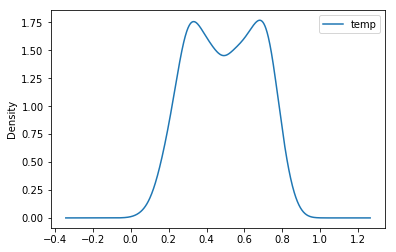

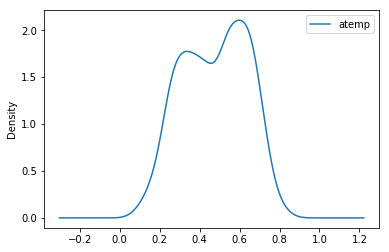

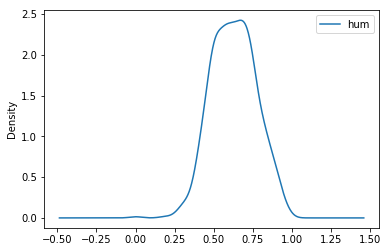

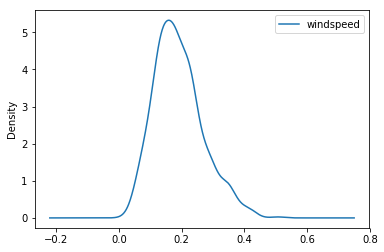

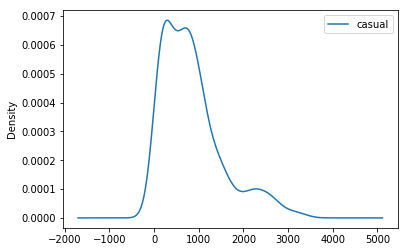

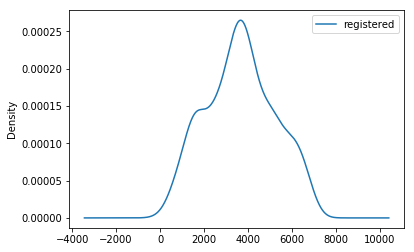

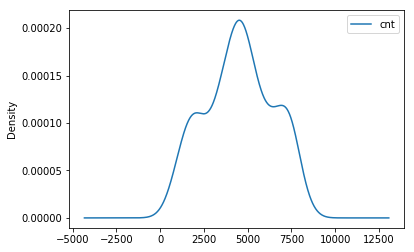

In [7]:
# Density plots 0f numeric variables
cnames= ['temp','atemp','hum','windspeed','casual','registered','cnt']
for i in cnames:
    pd.DataFrame(data[i]).plot(kind='density')

C:\Users\Navaneeth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Bike rental count wrt season')

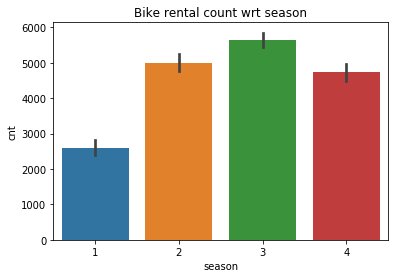

In [8]:
# Bike rental count with respect to season
%matplotlib inline
sns.barplot(x='season',y='cnt',data=data).set_title("Bike rental count wrt season")

Text(0.5,1,'Bike count wrt workingday')

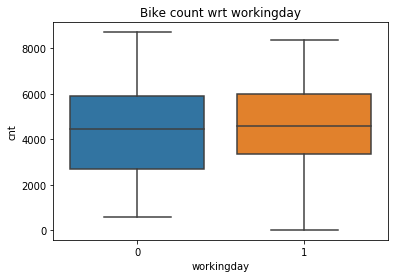

In [9]:
# Bike count with respect to workingday
sns.boxplot(x='workingday',y='cnt',data=data).set_title('Bike count wrt workingday')

Text(0.5,1,'Bike count wrt holiday')

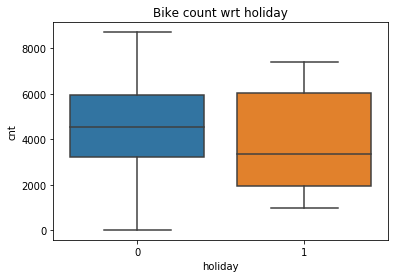

In [10]:
#Bike count with respect to holiday
sns.boxplot(x='holiday',y='cnt',data=data).set_title('Bike count wrt holiday')

Text(0.5,1,'Bike count wrt weekdays')

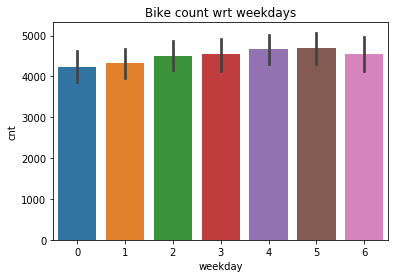

In [11]:
# Bike count with respect to weekdays
sns.barplot(x='weekday',y='cnt',data=data).set_title('Bike count wrt weekdays')

Text(0.5,1,'Bike count wrt months')

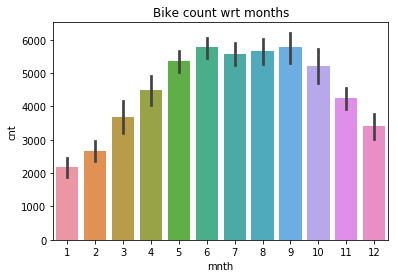

In [12]:
# Bike count with respect to months
sns.barplot(x='mnth',y='cnt',data=data).set_title('Bike count wrt months')

Text(0.5,1,'Bike count wrt year')

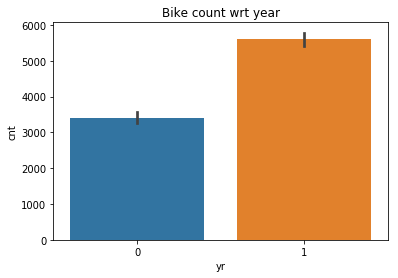

In [13]:
# Bike count with respect to year
sns.barplot(x='yr',y='cnt',data=data).set_title('Bike count wrt year')

Text(0.5,1,'Bike count wrt year & months')

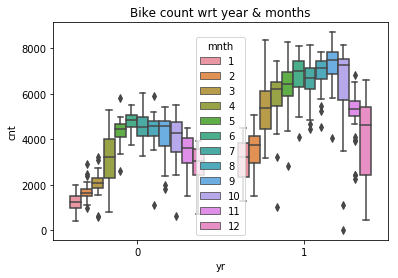

In [14]:
# Bike count with respect to year & months
sns.boxplot(x='yr',y='cnt',hue='mnth',data=data).set_title('Bike count wrt year & months')

Text(0.5,1,'Bike count wrt weather condition')

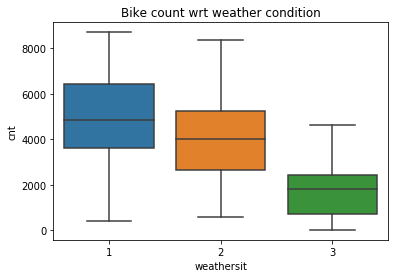

In [15]:
# Bike count with respect to weather situation
sns.boxplot(x='weathersit',y='cnt',data=data).set_title('Bike count wrt weather condition')

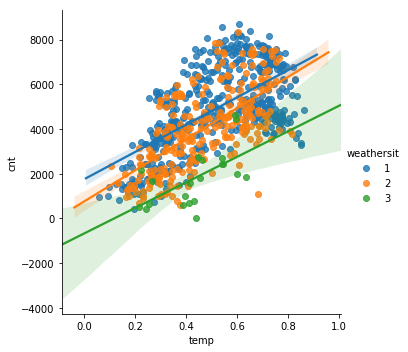

In [16]:
# Bike count with respect to temperature & weather situation
sns.lmplot(x='temp',y='cnt',hue='weathersit',data=data)

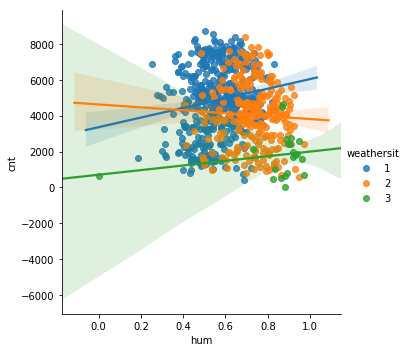

In [17]:
# Bike count with respect to humidity & weather situation
sns.lmplot(x='hum',y='cnt',hue='weathersit',data=data)

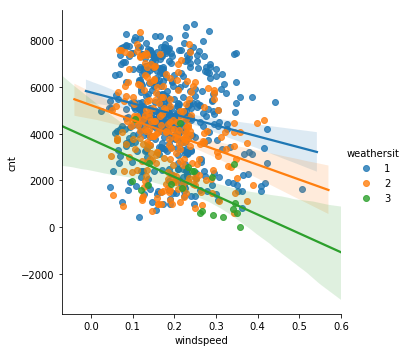

In [18]:
# Bike count with respect to windspeed & weather situation
sns.lmplot(x='windspeed',y='cnt',hue='weathersit',data=data)

# Missing Value Analysis

In [19]:
#Store the sum of null values as a dataframe in a new variable
missing_val = pd.DataFrame(data.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variables
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

     Variables  Missing_percentage
0       season                 0.0
1           yr                 0.0
2         mnth                 0.0
3      holiday                 0.0
4      weekday                 0.0
5   workingday                 0.0
6   weathersit                 0.0
7         temp                 0.0
8        atemp                 0.0
9          hum                 0.0
10   windspeed                 0.0
11      casual                 0.0
12  registered                 0.0
13         cnt                 0.0


In [20]:
# Get the names of numeric and categorical variables
cnames=[]
cat_names=[]

for i in range(0,data.shape[1]):
    if (data.iloc[:,i].dtype=='object'):
        cat_names.append(data.columns[i])
        
    else:
        cnames.append(data.columns[i])
        
print("The numeric variables are :",cnames)
print("The categorical variables are :",cat_names)    

The numeric variables are : ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
The categorical variables are : ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


# Outlier Analysis & Treatment

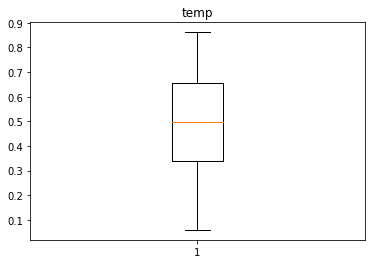

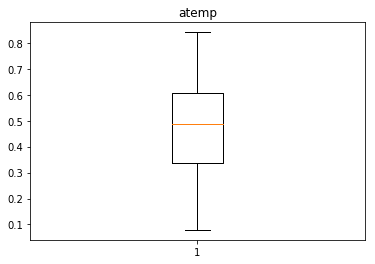

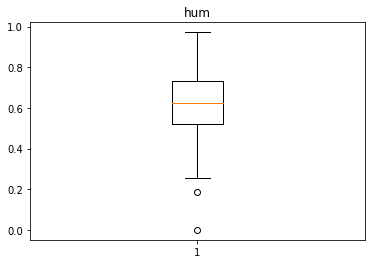

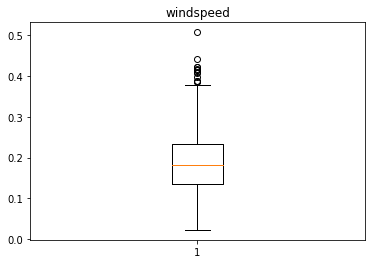

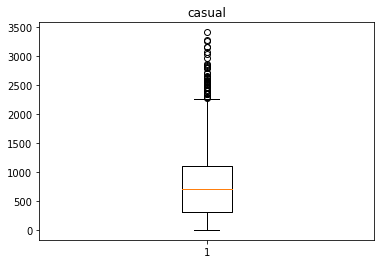

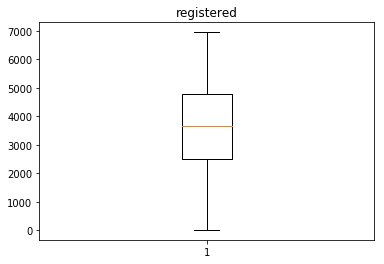

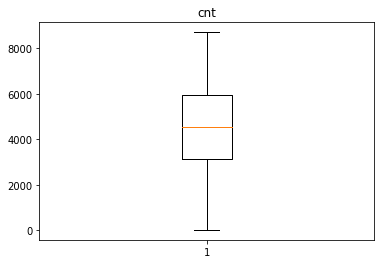

In [21]:
# Plotting boxplot to visulaize outliers for all the numeric variables
%matplotlib inline
for i in cnames :
    plt.figure()
    plt.clf()
    plt.boxplot(data[i])
    plt.title(i)
    #plt.savefig(i)
    plt.show()

In [22]:
# We are imputing outliers present in hum & windspeed variables with NA
names=['hum','windspeed']

for i in names:
    print(i)
    q75,q25=np.percentile(data.loc[:,i],[75,25])
    iqr= q75-q25
    
    minimum = q25-(1.5*iqr)
    maximum = q75+(1.5*iqr)
    print('Minimum value is',minimum)
    print('Maximum value is',maximum)
     
    data.loc[:,i][data.loc[:,i] < minimum]= np.nan
    data.loc[:,i][data.loc[:,i] > maximum]= np.nan

hum
Minimum value is 0.20468725
Maximum value is 1.0455212500000002
windspeed
Minimum value is -0.012446750000000034
Maximum value is 0.38061125


C:\Users\Navaneeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Navaneeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
# Impute the Outlier NAs with KNN imputation
data= pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.520
Imputing row 101/731 with 0 missing, elapsed time: 0.520
Imputing row 201/731 with 0 missing, elapsed time: 0.520
Imputing row 301/731 with 0 missing, elapsed time: 0.520
Imputing row 401/731 with 0 missing, elapsed time: 0.520
Imputing row 501/731 with 0 missing, elapsed time: 0.520
Imputing row 601/731 with 0 missing, elapsed time: 0.520
Imputing row 701/731 with 0 missing, elapsed time: 0.520


In [24]:
# Verify if there is any NA's in the dataset
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
#After KNN imputation all the variables will be in 'float' datatype, hence I'm converting all the object datatypes as it were before.
cat_names=['season','yr','mnth','holiday','weekday','workingday','weathersit']

for i in cat_names:
    print(i)
    data[i] = data[i].astype('object')
data.dtypes

season
yr
mnth
holiday
weekday
workingday
weathersit


season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

# Feature Selection

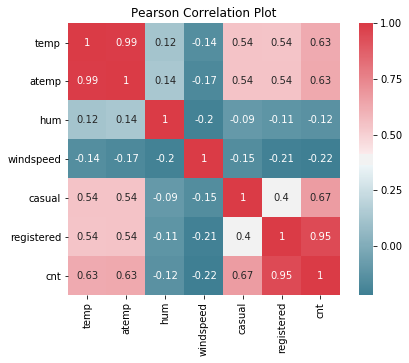

In [26]:
# Correlation Analysis
#Extract numeric variables dataset for correlation analysis
n_names=['temp','atemp','hum','windspeed','casual','registered','cnt']
numeric_data= data.loc[:,n_names]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = numeric_data.corr()
#Plot using seaborn library
plt.title('Pearson Correlation Plot')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)


In [27]:
#Finding correlation between categorical variables
factor_data = data.loc[:,cat_names]

#Comparing the columns
factors_paired = [(i,j) for i in factor_data.columns.values for j in factor_data.columns.values] 
chi2, p_values =[], []

for k in factors_paired:
    #print(f[0], f[1])
    if k[0] != k[1]:
        chitest = chi2_contingency(pd.crosstab(factor_data[k[0]], factor_data[k[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      #for same factor pair
        chi2.append(0)
        p_values.append(0)
chi2 = np.array(p_values).reshape((7,7)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index = factor_data.columns.values, columns=factor_data.columns.values)
print(chi2)

              season        yr      mnth       holiday        weekday  \
season      0.000000  0.999929  0.000000  6.831687e-01   1.000000e+00   
yr          0.999929  0.000000  1.000000  9.949247e-01   9.999996e-01   
mnth        0.000000  1.000000  0.000000  5.593083e-01   1.000000e+00   
holiday     0.683169  0.994925  0.559308  0.000000e+00   8.567055e-11   
weekday     1.000000  1.000000  1.000000  8.567055e-11   0.000000e+00   
workingday  0.886557  0.979943  0.993350  4.033371e-11  6.775031e-136   
weathersit  0.021179  0.127379  0.014637  6.008572e-01   2.784593e-01   

               workingday  weathersit  
season       8.865568e-01    0.021179  
yr           9.799434e-01    0.127379  
mnth         9.933495e-01    0.014637  
holiday      4.033371e-11    0.600857  
weekday     6.775031e-136    0.278459  
workingday   0.000000e+00    0.253764  
weathersit   2.537640e-01    0.000000  


In [28]:
#ANOVA Test performed for all the categorical variables and weekday has high p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('cnt ~ weekday',data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print (aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.765902e+07  2.943170e+06  0.782862  0.583494
Residual  724.0  2.721876e+09  3.759498e+06       NaN       NaN


In [29]:
#Features to be dropped
data_new=data.drop(['atemp','weekday','casual','registered'],axis=1)
print("The shape of the data after dropping the unnecessary variables are :",data_new.shape)
data_new.head()

The shape of the data after dropping the unnecessary variables are : (731, 10)


,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,0,1,1,0.226957,0.436957,0.186900,1600.0


# Train-Test Split

In [30]:
#Import Libraries for decision tree
from sklearn.model_selection import train_test_split
#Separate the independent & target variables
X = data_new.iloc[:,0:9]
y = data_new.iloc[:,9]
#Splitting into train and test, with 70:30 ratio respectively
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 4)

In [31]:
# import MSE function
from sklearn.metrics import mean_squared_error
# Function for calculating MAPE
def mape(act,pred):
    m=np.mean(np.abs((act - pred)/act))*100
    return m

# Decision Tree Model with 10-fold cross validation

In [35]:
# import the gridserachcv function & decision tree function
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# define a list of range of depths for the decision tree model to be built
depth=list(range(1,9))
param_grid= dict(max_depth=depth)
print(param_grid)
# instantiate the gridsearch using decisiontree model
DTmod=DecisionTreeRegressor(random_state=3) 
grid = GridSearchCV(DTmod, param_grid, cv=10,scoring='r2', return_train_score=False)
#Fit the grid on the trian data
grid.fit(X_train,y_train)
#Print the best estimated model
print("The best cross validated estimator of decision tree is :",grid.best_estimator_)
# Print the best score of r-square
print("The best cross validated r-square of decision tree is :",grid.best_score_)
#Print the given parameters & corresponding r-square value from each 10-fold cross validation 
pd.DataFrame(grid.cv_results_)[['param_max_depth', 'mean_test_score', 'params']]

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}
The best cross validated estimator of decision tree is : DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')
The best cross validated r-square of decision tree is : 0.7939692825554245


C:\Users\Navaneeth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_max_depth,mean_test_score,params
0,1,0.365767,{'max_depth': 1}
1,2,0.651549,{'max_depth': 2}
2,3,0.744098,{'max_depth': 3}
3,4,0.772962,{'max_depth': 4}
4,5,0.788411,{'max_depth': 5}
5,6,0.791102,{'max_depth': 6}
6,7,0.793969,{'max_depth': 7}
7,8,0.773319,{'max_depth': 8}


In [41]:
# Predict on the test dataset
DT_predicted=grid.predict(X_test)
# Print the MAPE & RMSE scores
print("The MAPE of DT prediction is : %.4f" % mape(y_test,DT_predicted))
print("The RMSE of DT prediction is : %.4f" % np.sqrt(mean_squared_error(DT_predicted,y_test)))

The MAPE of DT prediction is : 20.5027
The RMSE of DT prediction is : 880.3916


In [39]:
# Save the Decision Tree model for future use
from sklearn.externals import joblib
joblib.dump(grid, "DecisionTree_Python_Final.sav")

['DecisionTree_Python_Final.sav']

# Random Forest Model with 10-fold cross validation

In [40]:
# Import the random forest module
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(random_state=1)
# Define the list of estimators for the Random forest to be built
est=list([100,200,300,400,500,600])
param_grid= dict(n_estimators=est)
print(param_grid)
# instantiate the gridsearch using random forest model
grid_rf = GridSearchCV(r, param_grid, cv=10,scoring='r2', return_train_score=False)
# Fit the random forest grid
grid_rf.fit(X_train,y_train)
#Print the best estimated model
print("The best cross validated estimator of Random Forest is :",grid_rf.best_estimator_)
# Print the best score of r-square
print("The best cross validated r-square of Random Forest is :",grid_rf.best_score_)
#Print the given parameters & corresponding r-square value from each 10-fold cross validation 
pd.DataFrame(grid_rf.cv_results_)[[ 'params','mean_test_score']]

{'n_estimators': [100, 200, 300, 400, 500, 600]}
The best cross validated estimator of Random Forest is : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
The best cross validated r-square of Random Forest is : 0.8720487162187205


,params,mean_test_score
0,{'n_estimators': 100},0.872049
1,{'n_estimators': 200},0.870029
2,{'n_estimators': 300},0.870603
3,{'n_estimators': 400},0.870454
4,{'n_estimators': 500},0.870955
5,{'n_estimators': 600},0.871381


In [42]:
# Predict on the test dataset
predicted_rf=grid_rf.predict(X_test)
# Print the MAPE & RMSE scores
print("The MAPE of Random Forest prediction is : %.4f" %mape(y_test,predicted_rf))
print("The RMSE of Random Forest prediction is : %.4f" %np.sqrt(mean_squared_error(predicted_rf,y_test)))

The MAPE of Random Forest prediction is : 18.7033
The RMSE of Random Forest prediction is : 759.8633


In [43]:
# Save the Random forest model for future use
joblib.dump(grid_rf, "RF_model_Python_Final.sav")

['RF_model_Python_Final.sav']

# Linear Regression model with 10-fold cross validation

In [44]:
# Import the Linear Regression module
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
# Define the intercept value for the Linear Regression
intr=list(['True'])
param_grid= dict(fit_intercept=intr)
print(param_grid)
#instantiate the gridsearch using Linear Regression model
grid_lm = GridSearchCV(lm,param_grid, cv=10,scoring='r2', return_train_score=False)
# Fit the Linear Regression grid
grid_lm.fit(X_train,y_train)
#Print the best estimated model
print("The best cross validated estimator of Linear Regression is :",grid_lm.best_estimator_)
# Print the best score of r-square
print("The best cross validated r-square of Linear Regression is :",grid_lm.best_score_)
#Print the given parameters & corresponding r-square value from each 10-fold cross validation
pd.DataFrame(grid_lm.cv_results_)[[ 'params','mean_test_score']]

{'fit_intercept': ['True']}
The best cross validated estimator of Linear Regression is : LinearRegression(copy_X=True, fit_intercept='True', n_jobs=None,
         normalize=False)
The best cross validated r-square of Linear Regression is : 0.7937231164506273


,params,mean_test_score
0,{'fit_intercept': 'True'},0.793723


In [45]:
# Predict on the test dataset
predicted_lm=grid_lm.predict(X_test)
# Print the MAPE & RMSE scores
print("The MAPE of Linear Regression prediction is : %.4f" %mape(y_test,predicted_lm))
print("The RMSE of Linear Regression prediction is : %.4f" %np.sqrt(mean_squared_error(predicted_lm,y_test)))

The MAPE of Linear Regression prediction is : 20.9786
The RMSE of Linear Regression prediction is : 969.2466


In [46]:
# Save the Linear Regression model for future use
joblib.dump(grid_rf, "Linear_Regression_Python.sav")

['Linear_Regression_Python.sav']